## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [80]:
import os
import keras
import itertools
import numpy as np
import math
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)

In [15]:
LEARNING_RATE = 1e-3
MOMENTUM = 0.95

In [96]:
def run_with_different_parameter(user_define_optimizer,reduce_lr):
    ####################3
    x_train, y_train = train
    x_test, y_test = test
    # Preproc the inputs
    x_train = preproc_x(x_train)
    x_test = preproc_x(x_test)

    # Preprc the outputs
    y_train = preproc_y(y_train)
    y_test = preproc_y(y_test)
    ################
    ## 超參數設定
    EPOCHS = 50
    BATCH_SIZE = 1024
    ##############
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=user_define_optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    
    return train_loss, valid_loss, train_acc, valid_acc
    

In [ ]:
請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_60 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_178 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_179 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_180 (Bat (None, 128)               512       
__________

50000/50000 [==============================] - 1s 21us/step - loss: 1.2545 - acc: 0.5646 - val_loss: 1.4737 - val_acc: 0.4829
Epoch 45/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.2552 - acc: 0.5654 - val_loss: 1.4737 - val_acc: 0.4829
Epoch 46/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.2547 - acc: 0.5648 - val_loss: 1.4737 - val_acc: 0.4828
Epoch 47/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.2549 - acc: 0.5648 - val_loss: 1.4737 - val_acc: 0.4829
Epoch 48/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.2549 - acc: 0.5657 - val_loss: 1.4737 - val_acc: 0.4828
Epoch 49/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.2540 - acc: 0.5648 - val_loss: 1.4737 - val_acc: 0.4829
Epoch 50/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.2551 - acc: 0.5643 - val_loss: 1.4737 - val_acc: 0.4829


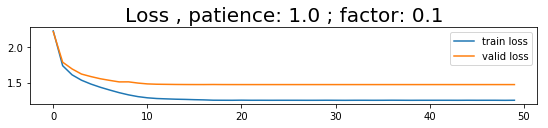

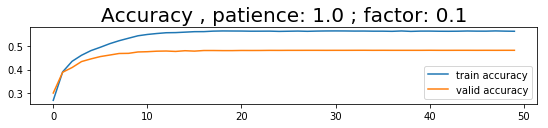

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_61 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_181 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_182 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_183 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 20us/step - loss: 3.0674 - acc: 0.0959 - val_loss: 3.0823 - val_acc: 0.0908


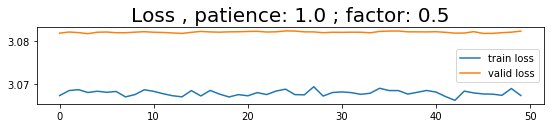

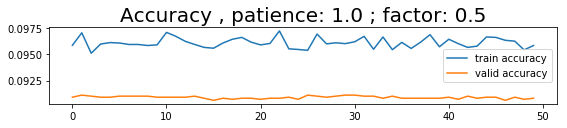

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_62 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_184 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_185 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_186 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 20us/step - loss: 3.0995 - acc: 0.0915 - val_loss: 3.0748 - val_acc: 0.0970


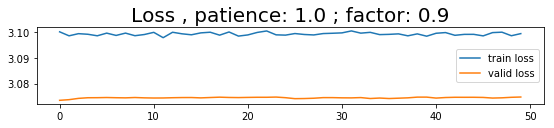

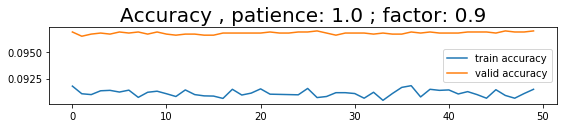

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_63 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_187 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_188 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_189 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 20us/step - loss: 3.0306 - acc: 0.1146 - val_loss: 3.0349 - val_acc: 0.1155


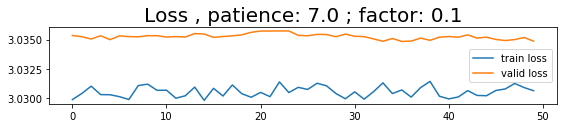

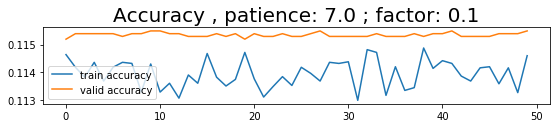

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_64 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_190 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_191 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_192 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 25us/step - loss: 3.0693 - acc: 0.0903 - val_loss: 3.0507 - val_acc: 0.0899


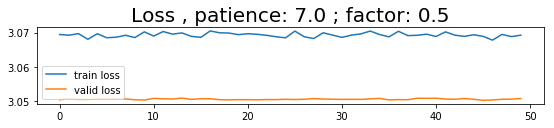

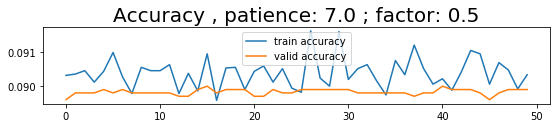

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_65 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_193 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_194 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_195 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 26us/step - loss: 3.0555 - acc: 0.1078 - val_loss: 3.0284 - val_acc: 0.1055


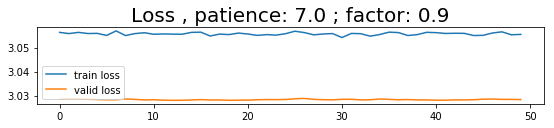

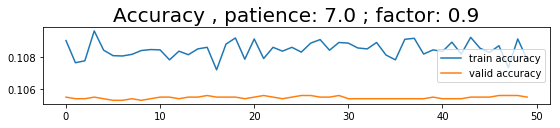

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_196 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_197 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_198 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 21us/step - loss: 3.0121 - acc: 0.1032 - val_loss: 3.0006 - val_acc: 0.1061


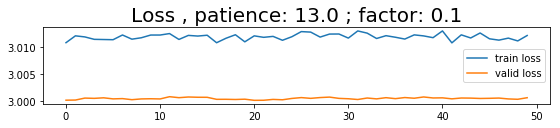

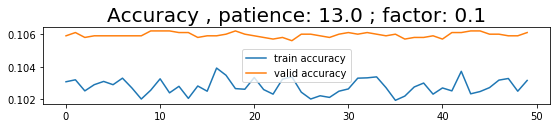

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_67 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_199 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_200 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_201 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 21us/step - loss: 3.0720 - acc: 0.0921 - val_loss: 3.0431 - val_acc: 0.0935


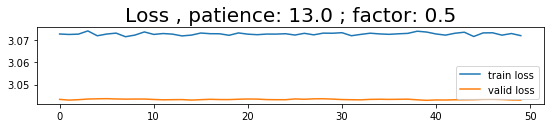

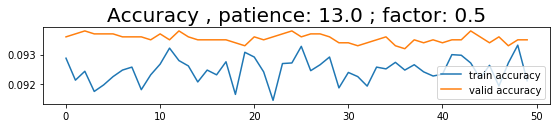

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_68 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_202 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_203 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_204 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 21us/step - loss: 3.1320 - acc: 0.0872 - val_loss: 3.1134 - val_acc: 0.0887


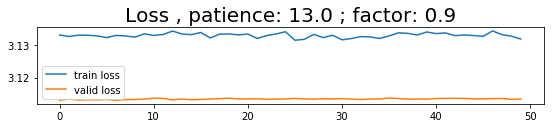

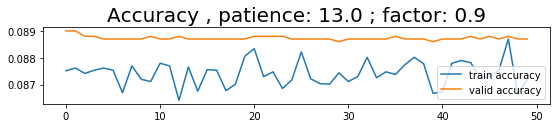

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_69 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_205 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_206 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_207 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 25us/step - loss: 3.1129 - acc: 0.0945 - val_loss: 3.1165 - val_acc: 0.0934


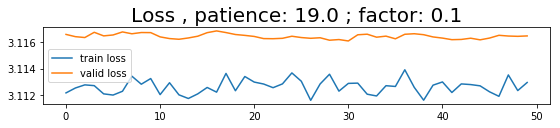

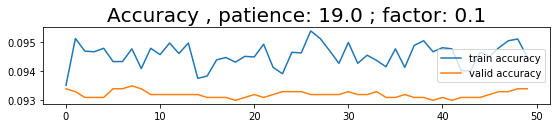

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_208 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_209 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_210 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 26us/step - loss: 2.9606 - acc: 0.1092 - val_loss: 2.9945 - val_acc: 0.1000


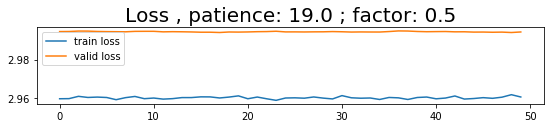

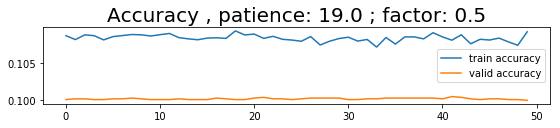

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_71 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_211 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_212 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_213 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 25us/step - loss: 3.0882 - acc: 0.0866 - val_loss: 3.1010 - val_acc: 0.0858


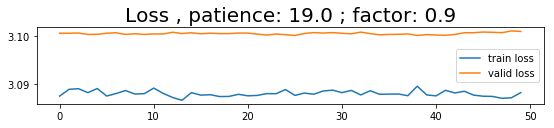

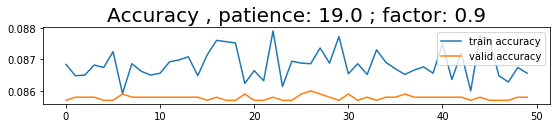

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_72 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_214 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_215 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_216 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 25us/step - loss: 3.0298 - acc: 0.0984 - val_loss: 3.0302 - val_acc: 0.0948


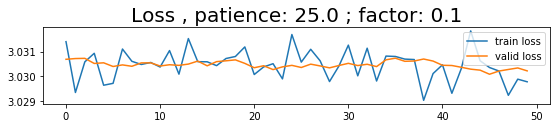

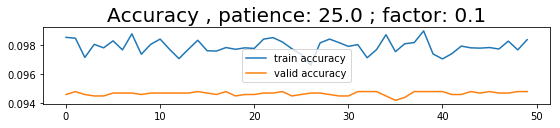

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_73 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_217 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_218 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_219 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 26us/step - loss: 2.9879 - acc: 0.1084 - val_loss: 2.9761 - val_acc: 0.1096


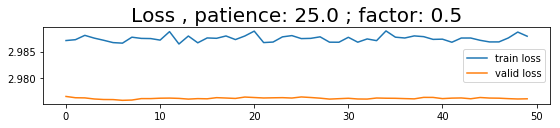

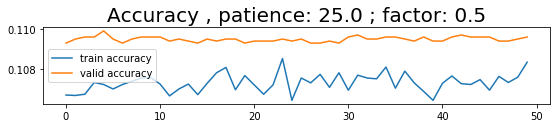

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_74 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_220 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_221 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_222 (Bat (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 1s 25us/step - loss: 3.0856 - acc: 0.0945 - val_loss: 3.1003 - val_acc: 0.0948


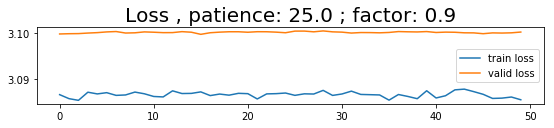

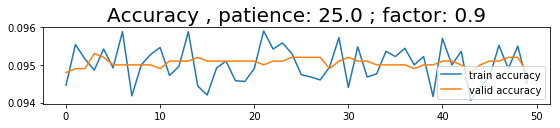

In [108]:
from itertools import permutations, repeat
import matplotlib.pyplot as plt
#設定輸入參數組合：
patiences = np.linspace(1,25,5)
factors = np.linspace(0.1,0.9,3)
parameters_permutaion = list(itertools.product(patiences,factors))
#設定optimizer為SGD
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
i=1
for patience,factor  in parameters_permutaion:
    reduce_lr = ReduceLROnPlateau(factor=factor, 
                          min_lr=1e-12, 
                          monitor='val_loss', 
                          patience=patience, 
                          verbose=1)
    train_loss, valid_loss, train_acc, valid_acc = run_with_different_parameter(optimizer, reduce_lr)

    %matplotlib inline
    plt.figure(figsize=(20,25))
    plt.subplot(len(parameters_permutaion),2,i)
    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title(f"Loss , patience: {patience} ; factor: {factor}", fontsize=20)
    plt.show()
    plt.figure(figsize=(20,25))
    plt.subplot(len(parameters_permutaion),2,i+1)
    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title(f"Accuracy , patience: {patience} ; factor: {factor}", fontsize=20)
    plt.show()

    i+=2


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_172 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_173 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_174 (Bat (None, 128)               512       
__________

Epoch 46/50
50000/50000 [==============================] - 1s 26us/step - loss: 0.2983 - acc: 0.9342 - val_loss: 1.6402 - val_acc: 0.5254

Epoch 00046: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
Epoch 47/50
50000/50000 [==============================] - 1s 25us/step - loss: 0.2959 - acc: 0.9348 - val_loss: 1.6406 - val_acc: 0.5242
Epoch 48/50
50000/50000 [==============================] - 1s 25us/step - loss: 0.2960 - acc: 0.9348 - val_loss: 1.6421 - val_acc: 0.5253
Epoch 49/50
50000/50000 [==============================] - 1s 26us/step - loss: 0.2955 - acc: 0.9351 - val_loss: 1.6421 - val_acc: 0.5252
Epoch 50/50
50000/50000 [==============================] - 1s 25us/step - loss: 0.2949 - acc: 0.9347 - val_loss: 1.6437 - val_acc: 0.5242


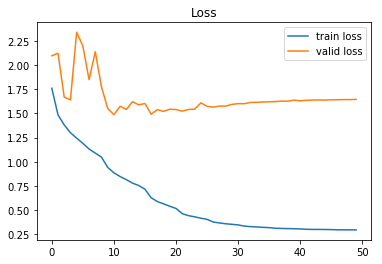

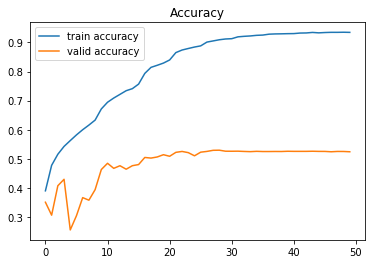

In [105]:
#改用adam
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)
train_loss, valid_loss, train_acc, valid_acc = run_with_different_parameter(optimizer, reduce_lr)
%matplotlib inline
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_59 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_175 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_176 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_177 (Bat (None, 128)               512       
__________

50000/50000 [==============================] - 1s 24us/step - loss: 0.2716 - acc: 0.9394 - val_loss: 1.7363 - val_acc: 0.5221
Epoch 47/50
50000/50000 [==============================] - 1s 24us/step - loss: 0.2697 - acc: 0.9410 - val_loss: 1.7355 - val_acc: 0.5201
Epoch 48/50
50000/50000 [==============================] - 1s 24us/step - loss: 0.2690 - acc: 0.9413 - val_loss: 1.7425 - val_acc: 0.5214
Epoch 49/50
50000/50000 [==============================] - 1s 25us/step - loss: 0.2674 - acc: 0.9413 - val_loss: 1.7497 - val_acc: 0.5240

Epoch 00049: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
Epoch 50/50
50000/50000 [==============================] - 1s 25us/step - loss: 0.2633 - acc: 0.9435 - val_loss: 1.7450 - val_acc: 0.5217


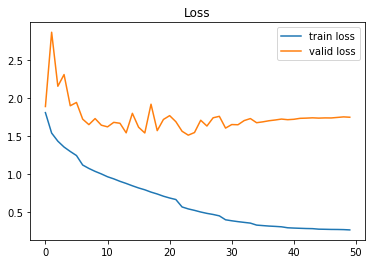

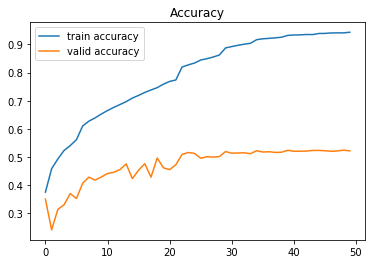

In [107]:
#改用RMSprop
optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE)
reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)
train_loss, valid_loss, train_acc, valid_acc = run_with_different_parameter(optimizer, reduce_lr)
%matplotlib inline
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()